In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
from Dipper_Project_Functions import plotparams
from Dipper_Project_Functions import read_lightcurve_csv
from Dipper_Project_Functions import read_lightcurve_dat
from Dipper_Project_Functions import custom_id
import daschlab
from daschlab.photometry import AFlags, BFlags
import scipy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.table import Table

In [2]:
# https://asas-sn.osu.edu/sky-patrol/coordinate/7207ecfb-fdfb-433b-a8c1-fd31e2d76d30

In [3]:
Gaia_id = 3152916838954800512
asassn_id = 266288137752																																																																
ra_val = 106.32899
dec_val = 6.205306

target_id = custom_id(ra_val,dec_val)
print(target_id)

J070519$+$061219


In [4]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [5]:
def jd_to_year_alt(jd):
    jd_epoch = 2415020.5 #- (2.458 * 10 **6)
    year_epoch = 1900
    days_in_year = 365.25
    return year_epoch + (jd - jd_epoch) / days_in_year

In [6]:
dfv, dfg = read_lightcurve_csv(asassn_id, 'Research/Updated_LC_Data')
#dfv, dfg = read_lightcurve_dat(asassn_id, 'Research/Updated_LC_Data')

dfv = dfv.loc[dfv.Mag < 20].reset_index(drop=True)
dfg = dfg.loc[dfg.Mag < 20].reset_index(drop=True)

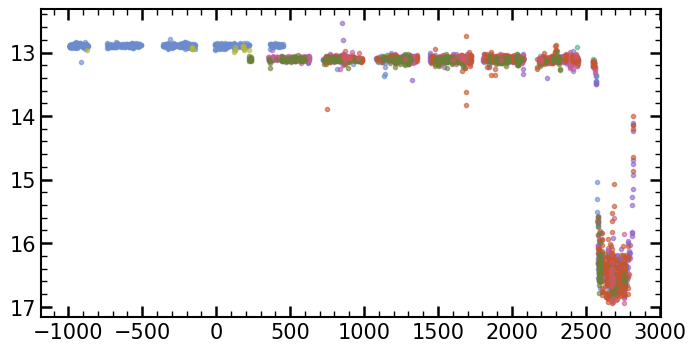

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)

for i in range(0,camnum):
    camdf = dfg.loc[dfg["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"].astype(float) - (2.458 * 10 ** 6)
    cammag = camdf["Mag"].astype(float)
    ax.scatter(camjd, cammag, color=colors[i], alpha=0.6, marker='.')

cams2 = dfv["Camera"]
camtype2 = np.unique(cams2)
camnum2 = len(camtype2)

for i in range(0,camnum2):
    camdf2 = dfv.loc[dfv["Camera"] == camtype2[i]].reset_index(drop=True)
    camjd2 = camdf2["JD"].astype(float) - (2.458 * 10 ** 6)
    cammag2 = camdf2["Mag"].astype(float) 
    ax.scatter(camjd2, cammag2, color=colors[i], alpha=0.6, marker='.')

ax.invert_yaxis()

In [8]:
# Fill in the SIMBAD-resolvable name of your target source:
SOURCE = "Gaia DR3 "+str(Gaia_id)

# Leave this unchanged unless you're sure that you want something else:
REFCAT = "apass"

In [9]:
print(SOURCE)

Gaia DR3 3152916838954800512


In [10]:
sess = daschlab.open_session(source=SOURCE)
sess.select_target(ra_deg=ra_val,dec_deg=dec_val)
sess.select_refcat(REFCAT)

Created new DASCH session at disk location `daschlab_gaia_dr3_3152916838954800512`
- Query target not yet defined - run something like `sess.select_target(name='HD 209458')`
- Refcat not yet fetched - after setting target, run something like `sess.select_refcat('apass')`
- Querying API ...
- Saved `query.json` resolved to: 7:05:19.0 +6:12:19
- Querying API ...


from erfa import ErfaWarning

 [astropy.utils.exceptions]


- Retrieved 3166 sources from reference catalog "apass" in 6 seconds and saved as `refcat.ecsv`


In [11]:
sess.refcat()[:10]

ref_text,ref_number,gsc_bin_index,pos,dra,ddec,u_pm_ra_cosdec,u_pm_dec,stdmag,color,v_flag,mag_flag,class,num_matches,refcat,local_id
,,,"deg,deg",arcsec,arcsec,mas / yr,mas / yr,mag,mag,,,,,,
str22,uint64,uint32,SkyCoord,float32,float32,float32,float32,float32,float32,uint16,uint16,uint16,uint32,str5,int64
APASS_J070519.0+061220,407051901061220,93618773,"106.329068,6.205423",-0.27915475,-0.4212,1.2,1.2,13.36,0.36,1,0,0,850,apass,0
N220112017857,11220112017857,93618773,"106.325159,6.207815",13.710762,-9.0324,33.7,33.7,17.05,0.87,1,0,3,15,apass,1
APASS_J070518.2+061235,407051821061235,93618773,"106.325835,6.209734",11.291406,-15.9408,0.0,0.0,15.57,0.16,1,0,0,3,apass,2
N220112017630,11220112017630,93618773,"106.32328,6.203219",20.435602,7.5132,0.0,0.0,18.03,0.97,1,0,3,4,apass,3
N220112017856,11220112017856,93618773,"106.325709,6.211037",11.7423315,-20.6316,3.4,3.4,15.08,1.0,1,0,3,78,apass,4
N220112017605,11220112017605,93595869,"106.338293,6.202396",-33.294666,10.476,0.0,0.0,18.19,1.99,1,0,3,7,apass,5
APASS_J070517.8+061301,407051781061301,93618773,"106.324087,6.216991",17.547188,-42.066,1.3,1.3,15.43,1.44,1,0,0,130,apass,6
N220112017632,11220112017632,93595868,"106.31656,6.200553",44.48602,17.1108,12.7,12.8,16.8,1.3,1,0,3,2,apass,7


In [12]:
Target = sess.lightcurve(0)
Target.summary()

- Querying API ...
- Retrieved 12297 relevant exposures in 20 seconds and saved as `exposures.ecsv`
- Querying API ...
- Fetched 3212 rows in 3 seconds and saved as `daschlab_gaia_dr3_3152916838954800512/lightcurves/APASS_J070519.0+061220.ecsv`
Total number of rows: 3212
Number of rejected rows: 0
Number of unrejected detections: 850
Mean/RMS mag: 13.140 mag ± 0.517 mag


In [13]:
Target.apply_standard_rejections()
print()
Target.summary()

Rejecting standard AFLAGS ...
Assigned rejection tag `aflags` to bit number 1
Marked 264 new rows as rejected; 264 total are rejected

After rejections, 586 non-rejected detections remain.

Total number of rows: 3212
Number of rejected rows: 264
Number of unrejected detections: 586
Mean/RMS mag: 13.200 mag ± 0.330 mag


In [14]:
hist_data = {'time': Target['time'], 'magcal_magdep': Target['magcal_magdep']}
Historical_df = pd.DataFrame(data=hist_data)
Historical_df = Historical_df.loc[Historical_df.magcal_magdep > 0].reset_index(drop=True)
Historical_df.head()

,time,magcal_magdep
0,2412499.63699,13.222796
1,2412937.529784,13.343378
2,2413472.841579,13.418313
3,2413490.84815,13.193619
4,2413496.804605,13.352938


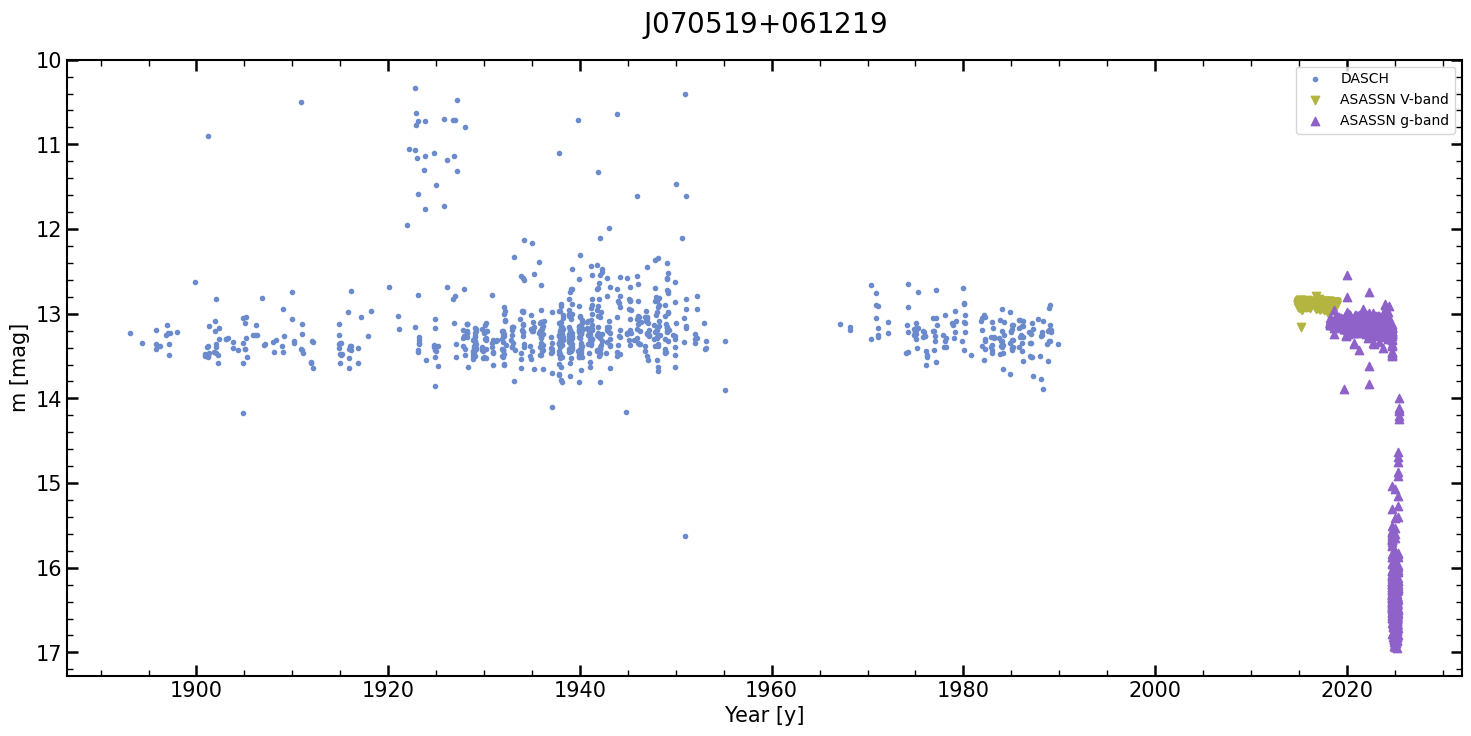

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
ax = plotparams(ax)

Historical_time = [jd_to_year_alt(float(i.value)) for i in Historical_df['time']]
Historical_mag = [float(i) for i in Historical_df['magcal_magdep']]
dfv_time = [jd_to_year_alt(i) for i in dfv.JD]
dfg_time = [jd_to_year_alt(i) for i in dfg.JD]

ax.scatter(Historical_time, Historical_mag, color=colors[0], marker='.', label='DASCH')
ax.scatter(dfv_time, dfv.Mag, color=colors[1], marker='v', label='ASASSN V-band')
ax.scatter(dfg_time, dfg.Mag, color=colors[2], marker='^', label='ASASSN g-band')

ax.set_xlabel('Year [y]', fontsize=15)
ax.set_ylabel('m [mag]', fontsize=15)
ax.set_title(target_id, y=1.03, fontsize=20)
ax.invert_yaxis()
ax.legend()